In [1]:
from fastscape.models import basic_model
from orographic_precipitation.fastscape_ext import precip_model
import xsimlab as xs
import xarray as xr
import numpy as np
%reload_ext xsimlab.ipython

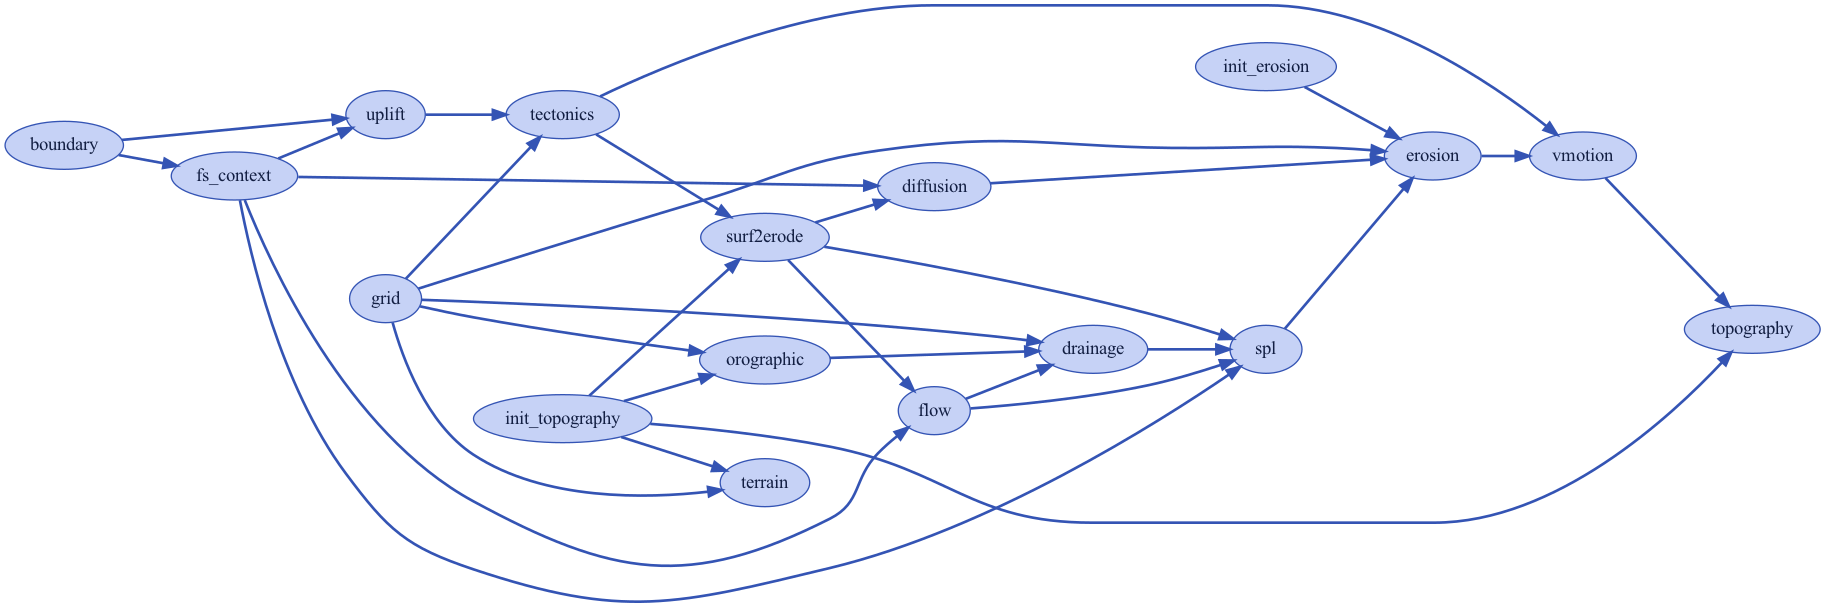

In [2]:
precip_model.visualize()

In [3]:
precip_model

<xsimlab.Model (17 processes, 22 inputs)>
grid
    shape                  [in] ('shape_yx',) nb. of grid nodes in ...
    length                 [in] ('shape_yx',) total grid length in ...
boundary
    status                 [in] () or ('border',) node status at bo...
fs_context
uplift
    rate                   [in] () or ('y', 'x') uplift rate
tectonics
init_topography
    seed                   [in] random seed
surf2erode
flow
orographic
    lapse_rate             [in] environmental lapse rate
    lapse_rate_m           [in] moist adiabatic lapse rate
    ref_density            [in] reference saturation water vapor de...
    latitude               [in] latitude
    precip_base            [in] ('y', 'x') background, non-orograph...
    rainfall_frequency  [inout] daily rainfall frequency
    wind_speed             [in] wind speed
    wind_dir               [in] wind direction (azimuth)
    conv_time              [in] conversion time
    fall_time              [in] fallout time
    nm

In [4]:
precip_base_arr = np.ones([101, 201])
precip_base_arr=precip_base_arr*5
print((precip_base_arr.shape))


(101, 201)


In [11]:
xr_2d = xr.DataArray(np.ones((101,201)), dims=['y','x'])
precip_base_xr=xr_2d*5
print(precip_base_xr)

<xarray.DataArray (y: 101, x: 201)>
array([[5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])
Dimensions without coordinates: y, x


In [15]:
dx = dy = 0.01
length = 1.5
x = np.arange(0.1, length, dx)
y = np.arange(0.1, length, dy)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

print(z.shape)
print(x.shape)
print(yy)

(140, 140)
(140,)
[[0.1 ]
 [0.11]
 [0.12]
 [0.13]
 [0.14]
 [0.15]
 [0.16]
 [0.17]
 [0.18]
 [0.19]
 [0.2 ]
 [0.21]
 [0.22]
 [0.23]
 [0.24]
 [0.25]
 [0.26]
 [0.27]
 [0.28]
 [0.29]
 [0.3 ]
 [0.31]
 [0.32]
 [0.33]
 [0.34]
 [0.35]
 [0.36]
 [0.37]
 [0.38]
 [0.39]
 [0.4 ]
 [0.41]
 [0.42]
 [0.43]
 [0.44]
 [0.45]
 [0.46]
 [0.47]
 [0.48]
 [0.49]
 [0.5 ]
 [0.51]
 [0.52]
 [0.53]
 [0.54]
 [0.55]
 [0.56]
 [0.57]
 [0.58]
 [0.59]
 [0.6 ]
 [0.61]
 [0.62]
 [0.63]
 [0.64]
 [0.65]
 [0.66]
 [0.67]
 [0.68]
 [0.69]
 [0.7 ]
 [0.71]
 [0.72]
 [0.73]
 [0.74]
 [0.75]
 [0.76]
 [0.77]
 [0.78]
 [0.79]
 [0.8 ]
 [0.81]
 [0.82]
 [0.83]
 [0.84]
 [0.85]
 [0.86]
 [0.87]
 [0.88]
 [0.89]
 [0.9 ]
 [0.91]
 [0.92]
 [0.93]
 [0.94]
 [0.95]
 [0.96]
 [0.97]
 [0.98]
 [0.99]
 [1.  ]
 [1.01]
 [1.02]
 [1.03]
 [1.04]
 [1.05]
 [1.06]
 [1.07]
 [1.08]
 [1.09]
 [1.1 ]
 [1.11]
 [1.12]
 [1.13]
 [1.14]
 [1.15]
 [1.16]
 [1.17]
 [1.18]
 [1.19]
 [1.2 ]
 [1.21]
 [1.22]
 [1.23]
 [1.24]
 [1.25]
 [1.26]
 [1.27]
 [1.28]
 [1.29]
 [1.3 ]
 [1.31]
 [1.32

In [25]:
from orographic_precipitation import compute_orographic_precip
from orographic_precipitation.tests.fixture_orographic_precipitation import input_params

#pytest.mark.usefixtures(input_params)
def test_compute_orographic_precip(input_params):
    dx = dy = 0.01
    length = 1.5
    x = np.arange(0.1, length, dx)
    y = np.arange(0.1, length, dy)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

    output = compute_orographic_precip(z, dx, dy, **input_params)
    assert type(output).__module__ == np.__name__
    assert z.shape == output.shape


In [26]:
val = (xr.DataArray(np.ones((140,140)), dims=['y','x'])*5)
print(val)

<xarray.DataArray (y: 140, x: 140)>
array([[5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])
Dimensions without coordinates: y, x


In [16]:
ds_in = xs.create_setup(
    model=precip_model,
    clocks={'time':np.linspace(0,10e6,101)
    },
    input_vars={
        'grid__shape': [101, 201],
        'grid__length': [100e3, 200e3],
        'boundary__status': ['looped', 'looped', 'fixed_value', 'fixed_value'],
        'uplift__rate': 5e-3,
        'spl__k_coef': 2.5e-5,
        'spl__area_exp': 0.4,
        'spl__slope_exp': 1.,
        'diffusion__diffusivity': 0.,
        'init_topography__seed': 1234,
        'orographic':{'rainfall_frequency':1, 
                         'latitude': 40, 
                         'precip_base': precip_base_xr,        
                         'wind_speed': 10,          
                         'wind_dir': 270,
         }
    },
    output_vars={
        'topography__elevation': 'time',
        'orographic__precip_rate':'time'
    }
)

In [17]:
with precip_model, xs.monitoring.ProgressBar():
    ds_out = ds_in.xsimlab.run()

             0% | initialize 

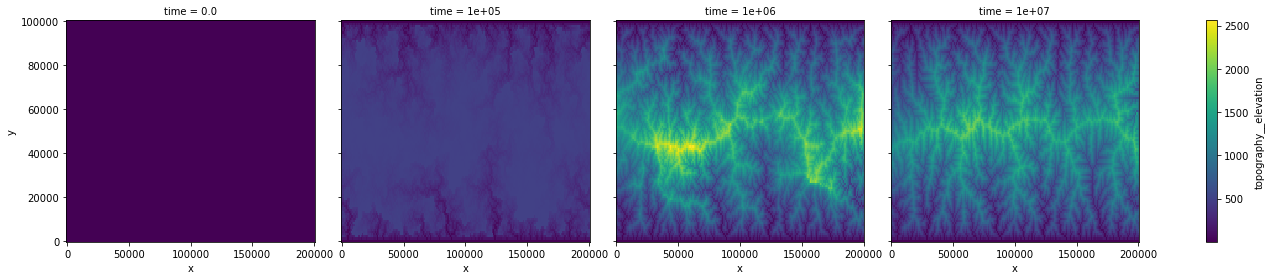

In [18]:
ds_out.topography__elevation.isel(time=[0,1,10,100]).plot(col='time',figsize=(20, 4))

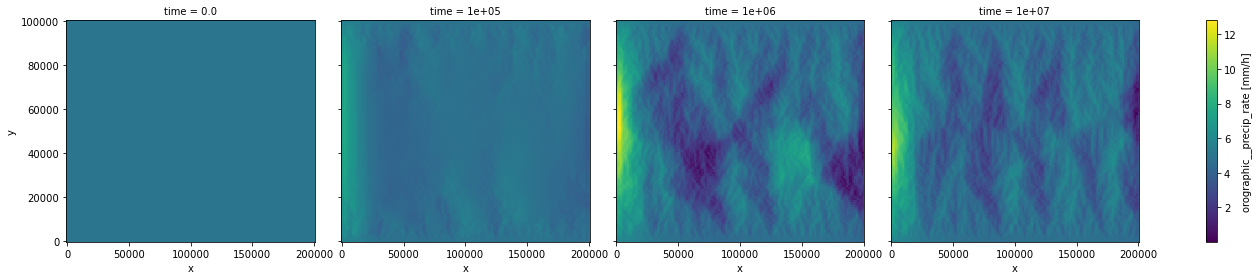

In [19]:
ds_out.orographic__precip_rate.isel(time=[0,1,10,100]).plot(col='time',figsize=(20, 4))